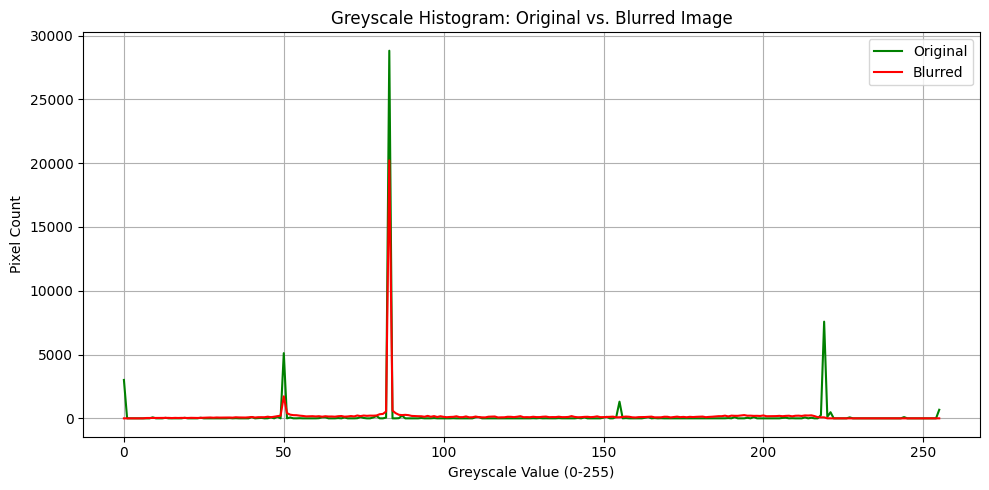

Kolmogorov-Smirnov Test: Statistic=0.18016790123456794, p-value=0.0
T-test: Statistic=-0.02532558725411566, p-value=0.9797953147071712

Saved: 'blurred_downscaled.png'


In [1]:
# This code uses the GPT-4o
from PIL import Image, ImageFilter

# Load the greyscale PNG image
image = Image.open("Test.png").convert("L")  # "L" mode is for 8-bit greyscale

# Apply Gaussian blur
blurred_image = image.filter(ImageFilter.GaussianBlur(radius=6))  # Gaussian blur filter with a radius of 5. 
# Gaussian blur softens the image by averaging pixels with their neighbors.
# The radius parameter controls how far the blur spreads from each pixel when calculating the blur effect.The larger the radius, the more pronounced the blur effect.

# Save the blurred image
blurred_image.save("blurred_output.png")

# Display the blurred image
blurred_image.show()

import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, ttest_ind
import numpy as np

#Calculate histograms
original_hist = image.histogram() #pixel brightness is distributed in the original image.
blurred_hist = blurred_image.histogram() # pixel brightness is distributed in the blurred image.

# Plot histograms
plt.figure(figsize=(10, 5)) #Creates a wide (10 inches by 5 inches) figure to hold the plot.
plt.plot(original_hist, label="Original", color='Green')
plt.plot(blurred_hist, label="Blurred", color='red')
plt.title("Greyscale Histogram: Original vs. Blurred Image")
plt.xlabel("Greyscale Value (0-255)")
plt.ylabel("Pixel Count") #number of pixels with that intensity
plt.legend()
plt.grid(True) # Adds a grid to the plot for better readability
plt.tight_layout() # adjusts spacing so labels don’t overlap
plt.show()

# Use scipy to perform statistical tests (p < 0.05 → significant difference in distribution)
#PIL as image-friendly, and NumPy as math-friendly
original_data = np.array(image).flatten()# Flatten the 2D arrays to 1D for statistical analysis
blurred_data = np.array(blurred_image).flatten()

ks_statistic, ks_p_value = ks_2samp(original_data, blurred_data) # Perform Kolmogorov-Smirnov test (compare the cumulative distributions)

t_statistic, t_p_value = ttest_ind(original_data, blurred_data) # Perform t-test (compare the means of two independent samples)

# Print the results of the statistical tests
print(f"Kolmogorov-Smirnov Test: Statistic={ks_statistic}, p-value={ks_p_value}")
print(f"T-test: Statistic={t_statistic}, p-value={t_p_value}")

#write out blurred image as a new PNG file and downscaled 250 x 250 pixel version
blurred_downscaled = blurred_image.resize((250, 250), Image.LANCZOS)
blurred_downscaled.save("blurred_downscaled.png")
print("\nSaved: 'blurred_downscaled.png'")